# Statlog (German Credit Data) Data Set
## Description
Classifies people described by a set of attributes as good or bad credit risks.

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1   | Status of existing checking account | A11 : ... < 0 DM, A12 : 0 <= ... < 200 DM, A13 : ... >= 200 DM / salary assignments for at least 1 year, A14 : no checking account |
| 2   | Duration in months | numerical |
| 3   | Credit history | A30 : no credits taken/ all credits paid back duly, A31 : all credits at this bank paid back duly, A32 : existing credits paid back duly till now, A33 : delay in paying off in the past, A34 : critical account/ other credits existing (not at this bank) |
| 4   | Purpose | A40 : car (new), A41 : car (used), A42 : furniture/equipment, A43 : radio/television, A44 : domestic appliances, A45 : repairs, A46 : education, A47 : (vacation - does not exist?), A48 : retraining, A49 : business, A410 : others |
| 5   | Credit amount | numerical  |
| 6   | Savings account/bonds | A61 : ... < 100 DM, A62 : 100 <= ... < 500 DM, A63 : 500 <= ... < 1000 DM, A64 : .. >= 1000 DM, A65 : unknown/ no savings account |
| 7   | Present employment since | A71 : unemployed, A72 : ... < 1 year, A73 : 1 <= ... < 4 years, A74 : 4 <= ... < 7 years, A75 : .. >= 7 years |
| 8   | Installment rate in percentage of disposable income | numerical |
| 9   | Personal status and sex | A91 : male : divorced/separated, A92 : female : divorced/separated/married, A93 : male : single, A94 : male : married/widowed, A95 : female : single |
| 10   | Other debtors/guarantors | A101 : none, A102 : co-applicant, A103 : guarantor |
| 11   | Present residence since | numerical |
| 12   | Property | A121 : real estate, A122 : if not A121 : building society savings agreement/ life insurance, A123 : if not A121/A122 : car or other, not in attribute 6, A124 : unknown / no property |
| 13   | Age in years | numerical |
| 14   | Other installment plans | A141 : bank, A142 : stores, A143 : none |
| 15   | Housing | A151 : rent, A152 : own, A153 : for free |
| 16   | Number of existing credits at this bank | numerical |
| 17   | Job | A171 : unemployed/ unskilled - non-resident, A172 : unskilled - resident, A173 : skilled employee / official, A174 : management/ self-employed/, highly qualified employee/ officer |
| 18   | Number of people being liable to provide maintenance for | numerical |
| 19   | Telephone | A191 : none, A192 : yes, registered under the customers name |
| 20   | Foreign worker | A201 : yes, A202 : no |

## Importing the Dataset

In [3]:
import numpy as np
import pandas as pd

# this data file has already been preprocessed to convert categorical values to numeric values
data = pd.read_csv("../../datasets/classification/german.data-numeric", delim_whitespace=True)

## Preprocessing the Dataset

In [4]:
data = data.replace("?", np.nan) 
data = data.dropna() 

The following block prints the shape and column datatypes of the processed dataset.

In [9]:
print(data.shape)
print(data.dtypes)

(999, 25)
1      int64
6      int64
4      int64
12     int64
5      int64
5.1    int64
3      int64
4.1    int64
1.1    int64
67     int64
3.1    int64
2      int64
1.2    int64
2.1    int64
1.3    int64
0      int64
0.1    int64
1.4    int64
0.2    int64
0.3    int64
1.5    int64
0.4    int64
0.5    int64
1.6    int64
1.7    int64
dtype: object


In [6]:
from sklearn.model_selection import train_test_split


X = (data.iloc[:,:data.shape[1]-1]).to_numpy()
y = (data.iloc[:,data.shape[1]-1:data.shape[1]]).to_numpy().flatten()

# Split the data set into a 60:20:20 (train:test:val) ratio
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, test_size = 0.20, random_state=0)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, train_size=0.75, test_size = 0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [8]:
# Manage imports
import sklearn.linear_model
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
from sklearn.naive_bayes import GaussianNB
from utilities import train_estimators, plot_estimator_scores

### Logistic Regression Classification

Training LogisticRegression(C=1e-05, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.0001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.001, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.01, max_iter=10000, random_state=0)...
Training LogisticRegression(C=0.1, max_iter=10000, random_state=0)...
Training LogisticRegression(C=1.0, max_iter=10000, random_state=0)...


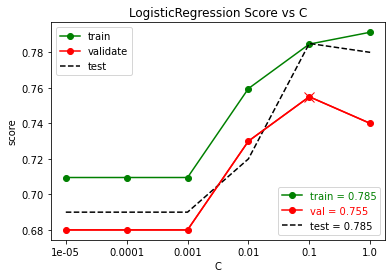

In [13]:
adjusted_parameter = 'C'
adjusted_parameter_values = [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]

LogisticRegressionEstimators = train_estimators(X_train, y_train,
                                                sklearn.linear_model.LogisticRegression,
                                                adjusted_parameter,
                                                adjusted_parameter_values,
                                                max_iter=10000,
                                                random_state=0)
plot_estimator_scores(LogisticRegressionEstimators,
                      adjusted_parameter,adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)


## SVM Classification

Training SVC(C=0.01, gamma=0.0001, random_state=0)...
Training SVC(C=0.1, gamma=0.0001, random_state=0)...
Training SVC(C=1.0, gamma=0.0001, random_state=0)...
Training SVC(C=10.0, gamma=0.0001, random_state=0)...
Training SVC(C=100.0, gamma=0.0001, random_state=0)...
Training SVC(C=1000.0, gamma=0.0001, random_state=0)...


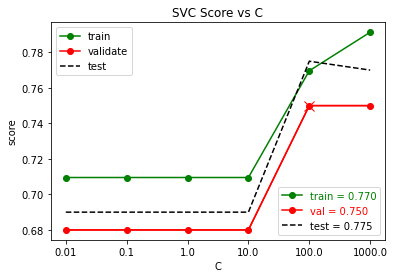

In [14]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1,1.0,10.0,100.0,1000.0]

SVMEstimators = train_estimators(X_train, y_train,
                                    sklearn.svm.SVC,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    random_state=0)

plot_estimator_scores(SVMEstimators,
                      adjusted_parameter, adjusted_parameter_values,
                      X_train, y_train, X_test, y_test, X_val, y_val)

## Decision Tree Classification

Training DecisionTreeClassifier(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeClassifier(max_depth=100, splitter='random', random_state=0)...


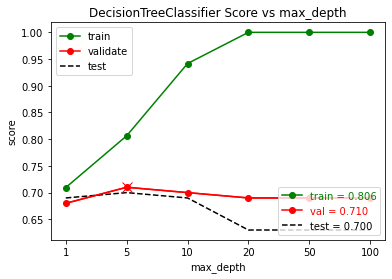

In [15]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train, y_train,
                                            sklearn.tree.DecisionTreeClassifier,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## RandomForest Classification

Training RandomForestClassifier(max_depth=1, random_state=0)...
Training RandomForestClassifier(max_depth=5, random_state=0)...
Training RandomForestClassifier(max_depth=10, random_state=0)...
Training RandomForestClassifier(max_depth=20, random_state=0)...
Training RandomForestClassifier(max_depth=50, random_state=0)...
Training RandomForestClassifier(max_depth=100, random_state=0)...


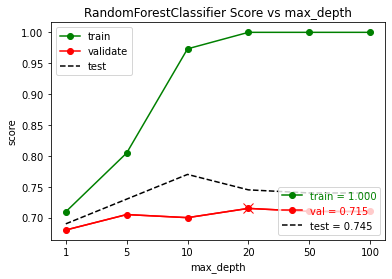

In [16]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.RandomForestClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## K-nearest Classification

Training KNeighborsClassifier(weights=uniform, n_neighbors=2)...
Training KNeighborsClassifier(weights=distance, n_neighbors=2)...


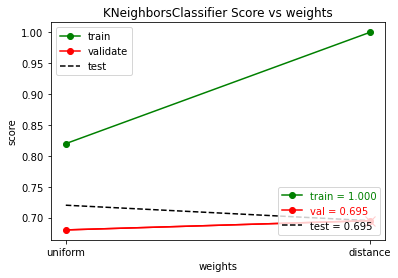

In [17]:

adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)



Training KNeighborsClassifier(algorithm=auto, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsClassifier(algorithm=brute, n_neighbors=2)...


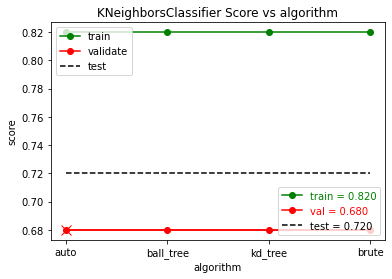

In [18]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train, y_train,
                                        sklearn.neighbors.KNeighborsClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)




## Ada Boost Classification

Training AdaBoostClassifier(n_estimators=10, random_state=0)...
Training AdaBoostClassifier(n_estimators=50, random_state=0)...
Training AdaBoostClassifier(n_estimators=100, random_state=0)...
Training AdaBoostClassifier(n_estimators=500, random_state=0)...
Training AdaBoostClassifier(n_estimators=1000, random_state=0)...
Training AdaBoostClassifier(n_estimators=5000, random_state=0)...


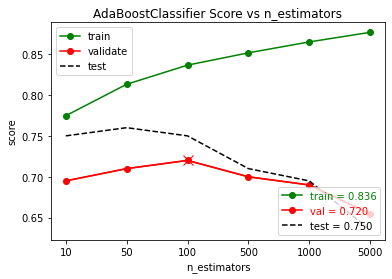

In [19]:

adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train, y_train,
                                        sklearn.ensemble.AdaBoostClassifier,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train, y_train, X_test, y_test, X_val, y_val)


## Gaussian Naive Bayes Classification

In [20]:
clf = GaussianNB()
NaiveBayesEstimator=clf.fit(X_train, y_train)
NB_training_scores = NaiveBayesEstimator.score(X_train, y_train)
NB_test_scores =  NaiveBayesEstimator.score(X_test, y_test)
NB_val_scores =  NaiveBayesEstimator.score(X_val, y_val)
print(NB_training_scores,NB_val_scores,NB_test_scores)

0.7245409015025042 0.665 0.735
